# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_excel('/Users/gost1/Desktop/Homework/geo.xlsx')

In [6]:
from sklearn.preprocessing import StandardScaler
X = data [['x', 'y']]
y = data['comment_class']

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

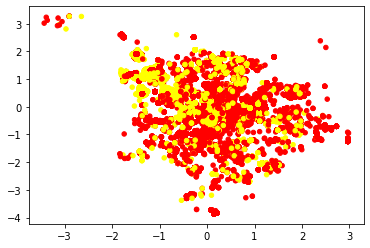

In [22]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn', s=20)

In [11]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [13]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

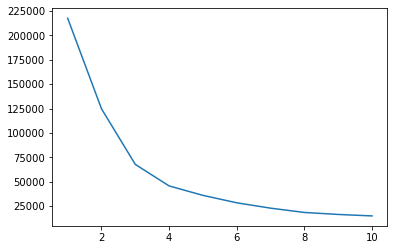

In [14]:
plt.plot(ks, k_inertia)

In [42]:
kmeans = KMeans(n_clusters = 6)
clusters = kmeans.fit_predict(X_scaled)

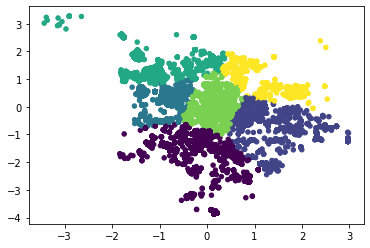

In [43]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=20)

In [32]:
X.head()

,x,y
0,37.612416,55.777454
1,37.612416,55.777454
2,37.603298,55.742108
3,37.558526,55.728758
4,37.566431,55.731794


In [35]:
data_agree = data[data['comment_class'] == 1]
data_disagree = data[data['comment_class'] == -1]

In [36]:
X_agree = data_agree [['x', 'y']]
X_disagree = data_disagree [['x', 'y']]

In [37]:
X_agree_scaled = scaler.fit_transform(X_agree)
X_disagree_scaled = scaler.fit_transform(X_disagree)

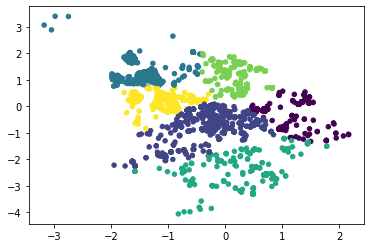

In [45]:
kmeans = KMeans(n_clusters = 6)
clusters = kmeans.fit_predict(X_agree_scaled)
plt.scatter(X_agree_scaled[:, 0], X_agree_scaled[:, 1], c=clusters, s=20)

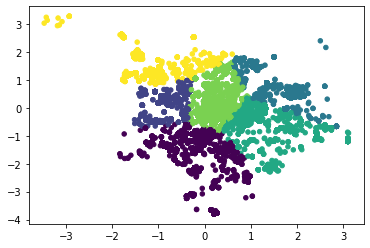

In [41]:
kmeans = KMeans(n_clusters = 6)
clusters = kmeans.fit_predict(X_disagree_scaled)
plt.scatter(X_disagree_scaled[:, 0], X_disagree_scaled[:, 1], c=clusters, s=20)

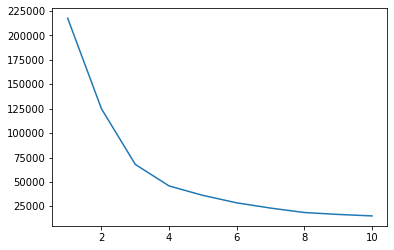

In [47]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)

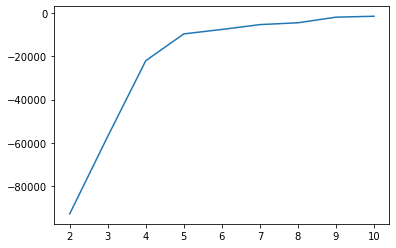

In [48]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

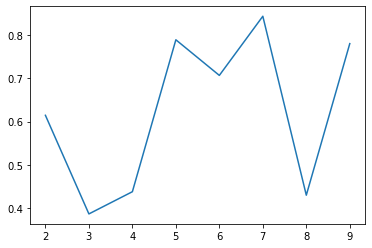

In [49]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)